In [9]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [16]:
# Read in the data
df_apo = pd.read_csv('./uptake_summary_table_apo.csv', header=0) #change csv name
df_bound = pd.read_csv('./uptake_summary_table_ONPF.csv', header=0)

#df_ref.drop(df_ref.index[0])
#df_ref.columns = df_ref.columns.astype(int)

#df_apo[df_apo['Sequence'] == 'IYGKTVYH'].head()


In [17]:
timepoints = df_apo['Deut Time (sec)'].unique()
peptides_apo = df_apo['Sequence'].unique()
peptides_bound = df_bound['Sequence'].unique()
#peptides_Ace2 = df_ace2['Sequence'].unique()

#numD = np.zeros([len(peptides), len(timepoints)])
#percentD = np.zeros([len(peptides), len(timepoints)])



IndexError: index 6 is out of bounds for axis 0 with size 6

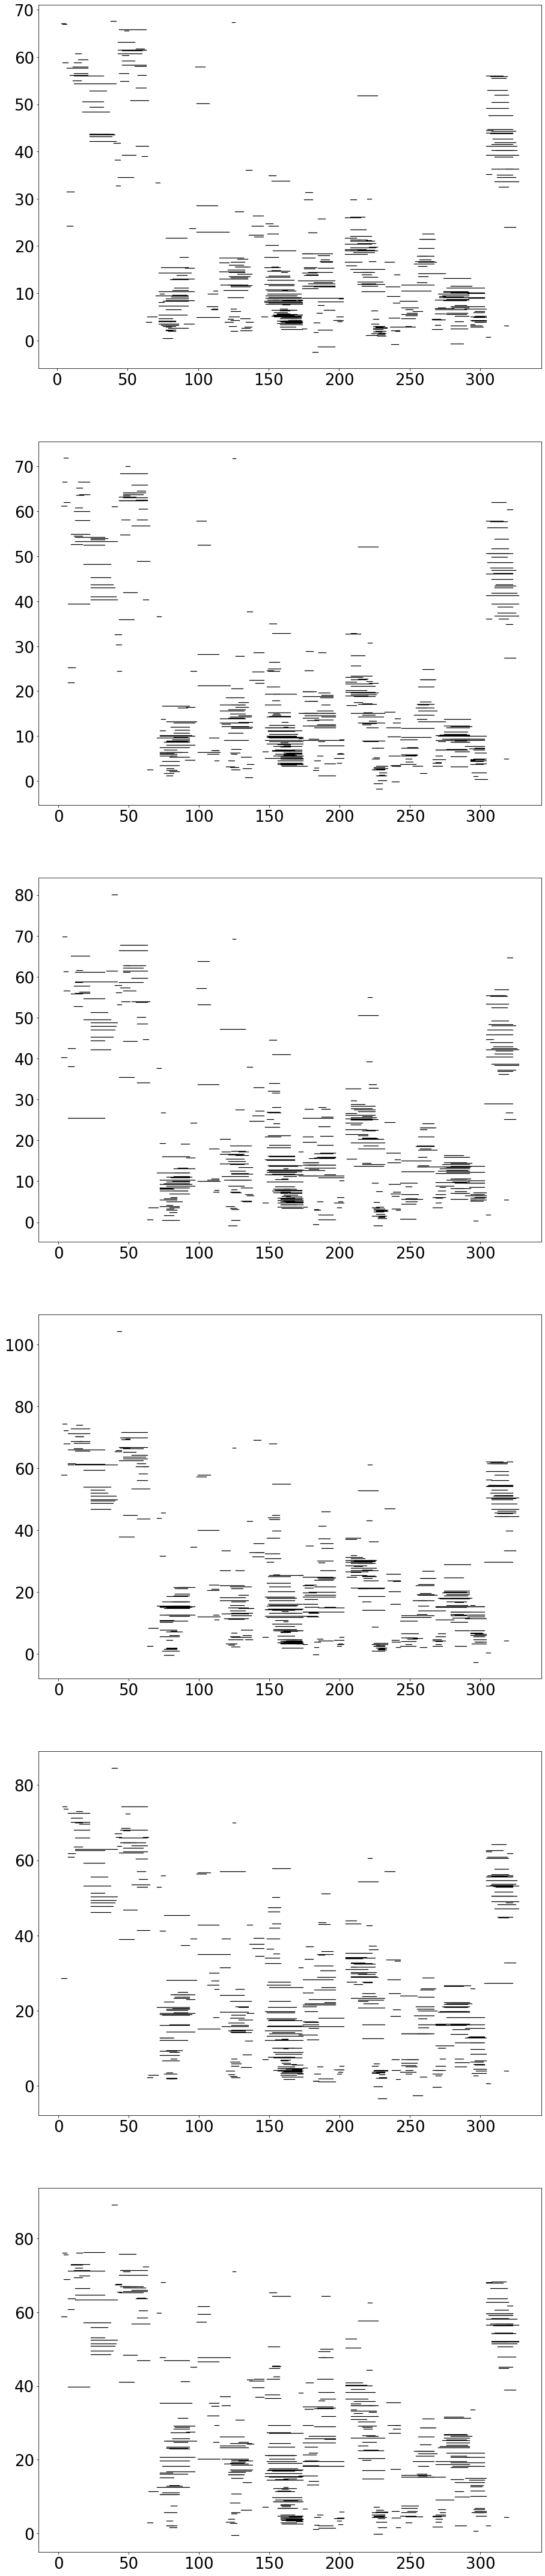

In [10]:
mpl.rcParams.update({"figure.figsize": (15, 10 * len(timepoints) - 2)})
mpl.rcParams.update({"font.size": 26})
fig, ax1 = plt.subplots(len(timepoints) - 2)
for i in range(1, len(timepoints - 2)):
    #plot apo
    for j in range(len(peptides_apo)):
        start = df_apo[df_apo['Sequence'] == peptides_apo[j]]['Start'].tolist()[0]
        end = df_apo[df_apo['Sequence'] == peptides_apo[j]]['End'].tolist()[0]
        xs = [start, end]
        ys_apo = np.ones(2) * df_apo[(df_apo['Sequence'] == peptides_apo[j]) & (df_apo['Deut Time (sec)'] == timepoints[i])]['%D'].tolist()[0]
        ax1[i-1].plot(xs, ys_apo, linewidth = 1.25, color='black')
    #for j in range(len(peptides_bound)):
            #start = df_bound[df_bound['Sequence'] == peptides_bound[j]]['Start'].tolist()[0]
            #end = df_bound[df_bound['Sequence'] == peptides_bound[j]]['End'].tolist()[0]
            #xs = [start, end]
            #ys_bound = np.ones(2) * df_bound[(df_bound['Sequence'] == peptides_bound[j]) & (df_bound['Deut Time (sec)'] == timepoints[i])]['%D'].tolist()[0]
            #ax1[i-1].plot(xs, ys_bound, linewidth = 1.25, color='#9E1A1A')
    #if timepoints[i] < 15000:
    #for j in range(len(peptides_Ace2)):
            #start = df_ace2[df_ace2['Sequence'] == peptides_Ace2[j]]['Start'].to_list()[0]
            #end = df_ace2[df_ace2['Sequence'] == peptides_Ace2[j]]['End'].to_list()[0]
            #xs = [start, end]
            #ys_Ace2 = np.ones(2) * df_ace2[(df_ace2['Sequence'] == peptides_Ace2[j]) & (df_ace2['Deut Time (sec)'] == timepoints[i])]['%D'].to_list()[0]
            #ax1[i-1].plot(xs, ys_Ace2, linewidth = 1, color='green')
        
ax1[i-1].set_xlabel("Amino Acid Number (N to C)")
ax1[i-1].set_ylabel("Percent Deuteration")
s = "t = " + str(timepoints[i]) + "s"
ax1[i-1].text(30, 90, s)
ax1[i-1].set_ylim([0, 100])
#ax1.xaxis.set_label_position('bottom')
#ax1.spines['bottom'].set_color('#ffffff')
#ax1.spines['left'].set_color('#ffffff')
plt.savefig("./WoodsPlot_Percent_shawties_zap_apo.png",  transparent=True)

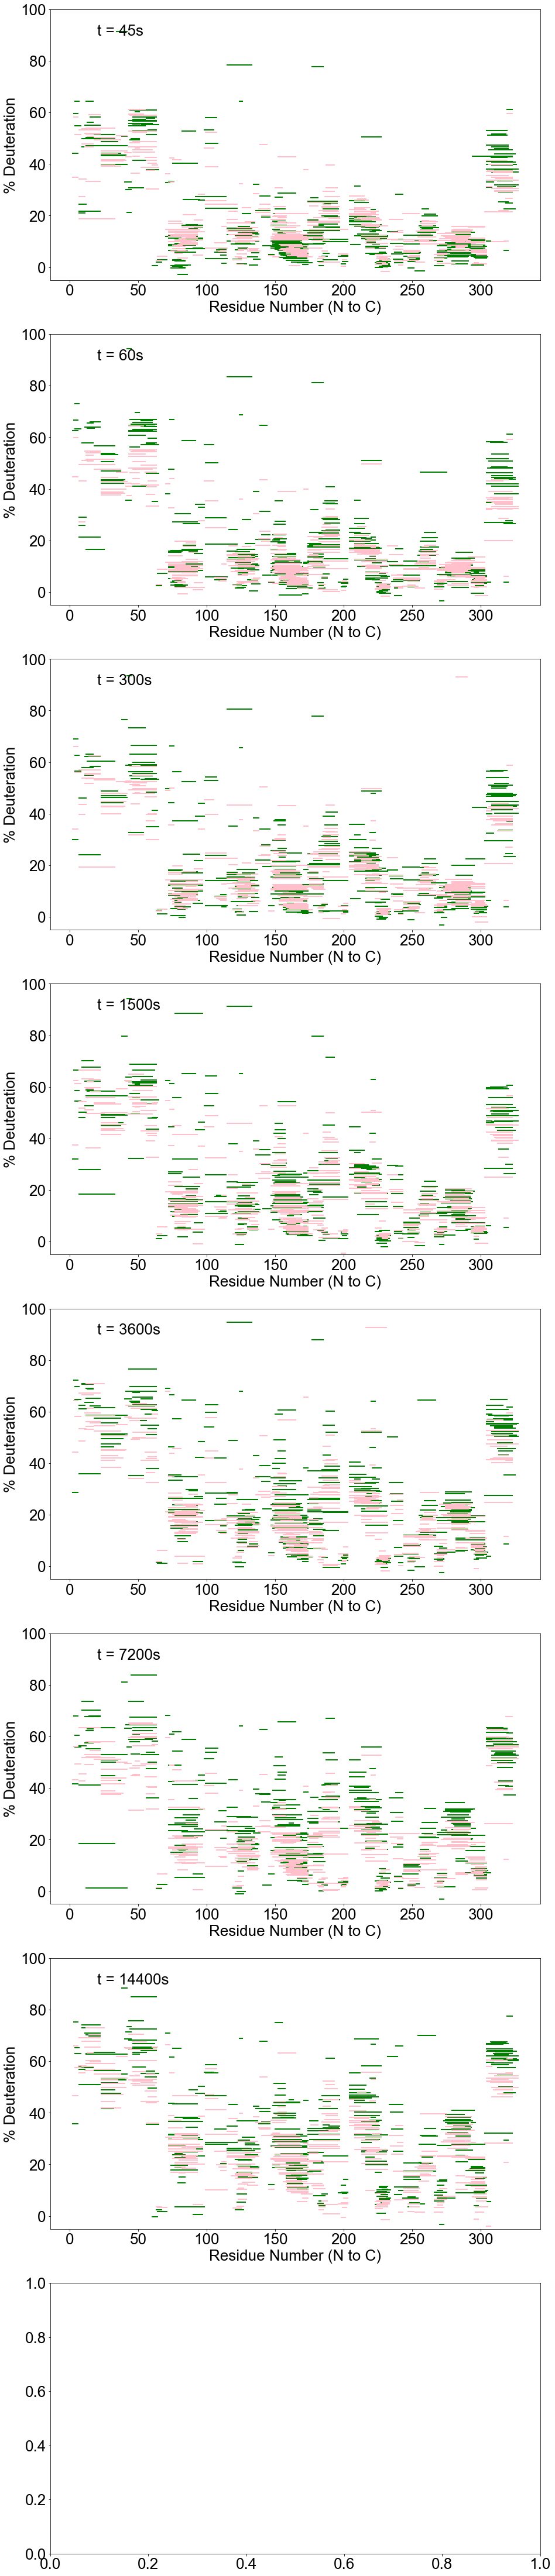

In [18]:
mpl.rcParams.update({"figure.figsize": (15, 10 * len(timepoints))})
mpl.rcParams.update({"font.size": 26, "font.family": 'Arial'})
fig, ax2 = plt.subplots(len(timepoints))
for i in range(1, len(timepoints)):
    #plot apo
    for j in range(len(peptides_apo)):
        start = df_apo[df_apo['Sequence'] == peptides_apo[j]]['Start'].tolist()[0]
        end = df_apo[df_apo['Sequence'] == peptides_apo[j]]['End'].tolist()[0]
        xs = [start, end]
        ys_apo = np.ones(2) * df_apo[(df_apo['Sequence'] == peptides_apo[j]) & (df_apo['Deut Time (sec)'] == timepoints[i])]['%D'].tolist()[0]
        ax2[i-1].plot(xs, ys_apo, linewidth = 2, color='green')
    for j in range(len(peptides_bound)):
            start = df_bound[df_bound['Sequence'] == peptides_bound[j]]['Start'].tolist()[0]
            end = df_bound[df_bound['Sequence'] == peptides_bound[j]]['End'].tolist()[0]
            xs = [start, end]
            ys_bound = np.ones(2) * df_bound[(df_bound['Sequence'] == peptides_bound[j]) & (df_bound['Deut Time (sec)'] == timepoints[i])]['%D'].tolist()[0]
            ax2[i-1].plot(xs, ys_bound, linewidth = 2, color='pink')
    #if timepoints[i] < 15000:
    #for j in range(len(peptides_Ace2)):
            #start = df_ace2[df_ace2['Sequence'] == peptides_Ace2[j]]['Start'].to_list()[0]
            #end = df_ace2[df_ace2['Sequence'] == peptides_Ace2[j]]['End'].to_list()[0]
            #xs = [start, end]
            #ys_Ace2 = np.ones(2) * df_ace2[(df_ace2['Sequence'] == peptides_Ace2[j]) & (df_ace2['Deut Time (sec)'] == timepoints[i])]['#D'].to_list()[0]
            #ax2[i-1].plot(xs, ys_Ace2, linewidth = 1, color='green')
        
    ax2[i-1].set_xlabel("Residue Number (N to C)")
    ax2[i-1].set_ylabel("% Deuteration")
    ax2[i-1].set_ylim([-5, 100])
    s = "t = " + str(timepoints[i]) + "s"
    ax2[i-1].text(20, 90, s)
plt.savefig("./WoodsPlot_apo_ONPF.png",  transparent=True)